In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
def u(x):
    return 1
def  u1(x):
    return x
def u2(x):
    return x**2
def u3(x):
    return x**3
def u4(x):
    return x**4
def sin(x):
    return math.sin(x)
def cos(x):
    return math.cos(x)
def checkinput(x,y):
    m,n=len(x),len(y)
    if m!=n:
        print('Check input')
    else:
        print('Input satisfied')
def plot_input(x,y):
    plt.scatter(x,y,s=30,cmap='palete')
    
def pack1(u,x):
    result=[]
    for i in range(len(u)):
        temp=list(map(u[i],x))
        result.append(temp)
    return np.array(result).T
def pack2(theta):
    return theta.T@theta
#Dùng viền quanh để tính nghịch đảo của M    
def vienquanh_inverse(A):
    n,_=A.shape
    if n==1:
        return 1/A
    elif n>1:
        start=1/A[0,0]
        for i in range(n-1):
            alpha11=start
            alpha12=A[:(i+1),i+1].reshape(i+1,1)
            alpha21=A[i+1,:i+1]
            alpha22=A[i+1,i+1]
            if i==0:
                X=alpha11*alpha12
            else :
                X=alpha11@alpha12
            if i==0:
                Y=alpha21*alpha11
            else :
                Y=alpha21@alpha11
                Y=Y.reshape(1,-1)
            if i==0:
                theta=alpha22-Y*alpha12
            else :
                theta=alpha22-Y@alpha12           
            if i==0:
                beta11=alpha11+(1/theta)*(X*Y)
            else :
                beta11=alpha11+(1/theta)*(X@Y)            
            beta12=-(1/theta)*X
            beta21=-(1/theta)*Y
            beta22=1/theta
            tempt_result=np.vstack((np.hstack((beta11,beta12)),np.hstack((beta21,beta22))))
            start=tempt_result
            np.savetxt('output.txt',tempt_result)    
        return tempt_result
def pack3(theta,M,y):
    return vienquanh_inverse(M)@theta.T@y
def graphord2(x,y,a):
    x_test=np.linspace(min(x),max(x),100000)
    y_test=np.array(list(map(lambda x:a[0]+a[1]*x+a[2]*(x**2),x_test)))
    plt.scatter(x,y,s=30,cmap='palete')
    plt.plot(x_test,y_test,'r')
    


In [10]:
A=np.array([[0.78,2.5],[1.4,1.2],[2.34,1.12],[3,2.25],[3.81,4.28]])
x=A[:,0]
y=A[:,1]

In [11]:
checkinput(x,y)

Input satisfied


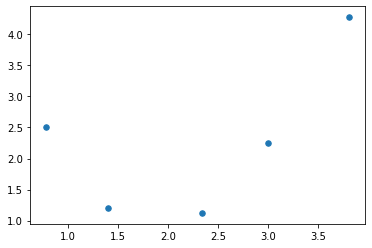

In [12]:
plot_input(x,y)

In [18]:
u=[u,u1,u3]

In [19]:
theta=pack1(u,x)
print(theta)

TypeError: 'list' object is not callable

In [15]:
M=pack2(theta)
print(M)

[[  5.          11.33        31.5601    ]
 [ 11.33        31.5601      98.337797  ]
 [ 31.5601      98.337797   325.91110513]]


In [16]:
a=pack3(theta,M,y)
print(a)

[ 4.82381599 -3.85815444  0.98047249]


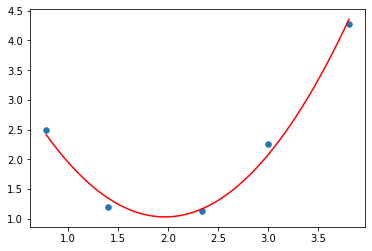

In [17]:
graphord2(x,y,a)
    